In [1]:
import pandas as pd

In [5]:
data = pd.read_excel(r'datasets/commerce_data.xlsx')
data

,product_price,discount,viewer,likes,sales
0,11700,0.29,650000,180000,11700
1,17400,0.44,650000,180000,87000
2,14000,0.47,650000,180000,8540000
3,29100,0.29,410000,18000,5063400
4,32000,NaN,350000,15000,1024000
...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080
2899,1390,0.26,1271,4509,31970
2900,1390,0.26,1271,4509,111200
2901,990,0.34,1271,4509,124740


In [6]:
data.shape

(2903, 5)

<Axes: xlabel='product_price', ylabel='sales'>

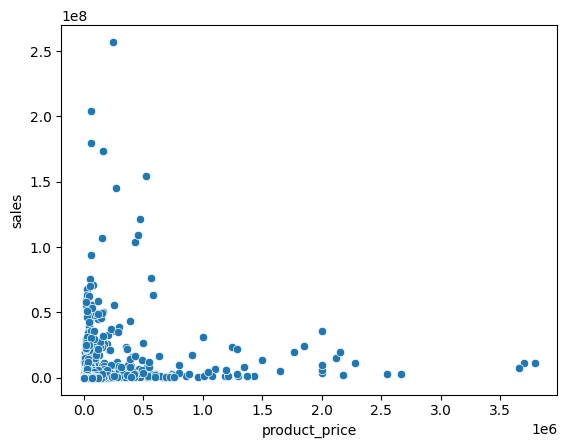

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.scatterplot(data=data, x='product_price', y='sales')


In [8]:
# replace NaN with 0
data['discount'] = data['discount'].fillna(0)

In [9]:
# find range of discounts
data['discount'].describe()

count    2903.000000
mean        0.285625
std         0.230007
min         0.000000
25%         0.100000
50%         0.260000
75%         0.420000
max         0.960000
Name: discount, dtype: float64

In [10]:
discount_category = []

for n in data['discount']:
    if n < 0.5:
        discount_category.append('low')
    else:
        discount_category.append('high')

data['discount_category'] = discount_category

In [11]:
data

,product_price,discount,viewer,likes,sales,discount_category
0,11700,0.29,650000,180000,11700,low
1,17400,0.44,650000,180000,87000,low
2,14000,0.47,650000,180000,8540000,low
3,29100,0.29,410000,18000,5063400,low
4,32000,0.00,350000,15000,1024000,low
...,...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080,low
2899,1390,0.26,1271,4509,31970,low
2900,1390,0.26,1271,4509,111200,low
2901,990,0.34,1271,4509,124740,low


# Wednesday 2/26 and (some) Monday 3/3 class stuff

In [12]:
sales_category = []

for i in range(len(data)):
    if data['sales'][i] > 1000000:
        sales_category.append('good')
    else:
        sales_category.append('bad')

data['sales_category'] = sales_category

In [16]:
# print first 100 rows
data.head(100)

,product_price,discount,viewer,likes,sales,discount_category,sales_category
0,11700,0.29,650000,180000,11700,low,bad
1,17400,0.44,650000,180000,87000,low,bad
2,14000,0.47,650000,180000,8540000,low,good
3,29100,0.29,410000,18000,5063400,low,good
4,32000,0.00,350000,15000,1024000,low,good
...,...,...,...,...,...,...,...
95,75000,0.00,120000,1090000,8550000,low,good
96,22500,0.10,120000,1090000,11250000,low,good
97,166000,0.00,120000,60000,11454000,low,good
98,27000,0.10,120000,1090000,17199000,low,good


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


import sklearn.svm as svm

In [17]:
encoder = LabelEncoder()
encoder.fit(data['discount_category'])
data['y'] = encoder.transform(data['discount_category'])

In [19]:
y = data['y']
x = data[['discount', 'likes']]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
print(x_train.shape)
print(y_train.shape)

(2032, 2)
(2032,)


In [ ]:
# Build svm model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(x_train, y_train)

In [ ]:
# predication based on the test data set
y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


In [ ]:
import shap
explain = shap.Explainer(svm_model, x)
shap_values = explain.shap_values(x)

In [ ]:
# shap.summary...